# Анализ оттока клиентов банка "Метанпром"

Ссылка на презентацию: https://docs.google.com/presentation/d/1Z7tFstCXLjVUfQuYMtNl6XyBkAgMRwecMcJBSmqCvc8/edit?usp=sharing

Ссылка на дашборд: https://public.tableau.com/app/profile/syuzanna.petrosyan/viz/banks_project_16775314571180/Dashboard12

## Введение

Настоящее исследование представляет собой анализ клиентов банка "Метанпром", их сегментирование и проверку гипотез.

**Целью проекта** является анализ оттока клиентов, поиск тех сегментов клиентов, которые в наибольшей степени склонны уходить из банка, а также подготовка рекомендаций для отдела маркетинга. 

**Задачи проекта:**
1. Исследование данных, поиск различных корреляций;
2. Составление портретов клиентов;
3. Проверка статистических гипотез;
4. Составление сегментов клиентов, приоритизация их в соответствии со степенью подверженности оттоку из банка;
5. Подготовка выводов и рекомендаций для отдела маркетинга.

**Декомпозиция проекта:**

1. Загрузка данных и импорт необходимых библиотек.
2. Предобработка данных:
    - приведение к корректному типу данных;
    - проверка на корректность наименований колонок
    - проверка на наличие пропусков;
    - проверка на наличие дубликатов;
    - проверка значений на наличие выбросов;
    - кодирование части данных;
    - категоризация части данных
3. Исследовательский анализ данных:
    - анализ отточных клиентов в разрезе различных параметров (город, пол, возраст);
    - составление портретов уходящих клиентов
4. Статистический анализ данных:
    - выдвижение первой гипотезы и ее проверка
    - выдвижение второй гипотезы и ее проверка
    - формулирование промежуточных выводов на основе статистического анализа
5. Сегментация пользователей и их приоритизация
6. Итоговые выводы и рекомендации по каждому из сегментов

## Предобработка данных

### Импорт библиотек и загрузка файла

In [155]:
# импортируем необходимые для работы библиотеки:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [156]:
# сохраним файл с данными в переменную data:

data = pd.read_csv('https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F')

### Переименование столбцов

In [157]:
# выведем на экран первые 10 строк датасета и ознакомимся со структурой данных:

display (data.head(10))

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
5,202305,856.00,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
6,177259,807.00,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0
7,218868,825.00,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0
8,211686,923.00,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0
9,133130,906.00,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0


Мы видим, что названия некоторых столбцов набраны заглавными буквами. Для удобства приведем названия столбцов к нижнему регистру. Также добавим "змеиный регистр" для столбца USERID.

In [158]:
# приведем названия столбцов к нижнему и "змеиному" регистрам:

data = data.rename (columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})
display (data.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


### Приведение данных к корректному типу

Далее проверим, насколько тип данных соответствует их содержанию.

In [159]:
# выведем на экран информацию о датасете и о типе данных в каждом столбце:

display (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


None

Мы видим, что в тип данных в столбцах адекватен их содержанию, поэтому можем перейти к следующему этапу предобработки - поиску пропусков.

### Работа с некорректными значениями

In [160]:
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.00,10000.00,10000.00,10000.00,7705.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,171814.71,848.70,42.84,2.63,827794.31,1.87,0.68,0.52,147866.89,0.18
std,33708.24,65.45,12.13,1.98,1980614.15,0.80,0.47,0.50,139388.51,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142810.25,802.00,34.00,0.00,295554.16,1.00,0.00,0.00,75251.90,0.00
50%,172728.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00
75%,201261.75,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174500.54,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


При ознакомлении с таблицей внимание привлекает минимальное значение в столбце products - 0. Если человек является клиентом банка, то значит он пользуется как минимум одним продуктом.

Взглянем на эту строку:

In [161]:
data[data['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.00,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1


Судя по всему, 0 в столбце products появился потому что этот клиент ушел из банка и теперь действительно больше не пользуется банковскими продуктами. Однако для целей анализа нам необходимо изучать последние актуальные данные на момент, когда отточные пользователи еще являлись клиентами банка, поэтому эту строку необходимо удалить.

In [162]:
# удалим строку с ошибкой:

data = data[data['products']!=0]
data['products'].describe()

count   9999.00
mean       1.87
std        0.80
min        1.00
25%        1.00
50%        2.00
75%        2.00
max        5.00
Name: products, dtype: float64

### Работа с пропусками

In [163]:
# выведем на экран количество пропусков для каждого из столбцов:

data.isnull().sum()

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2294
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Пропуски обнаружились лишь в одном столбце, однако их достаточно много (более 20%), поэтому удалять их было бы некорректно. Можно заменить средним или медианой, однако это может повлиять на результаты дальнейшего анализа, поэтому попробуем исследовать природу этих пропусков.

In [164]:
# Вызовем метод describe и проанализируем часть датасета, содержащую пропуски:

display (data[data['balance'].isna()].describe())

# Сравним с результатом вызова метода describe для всего датасета:

display (data.describe())

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2294.00,2294.00,2294.00,2294.00,0.00,2294.00,2294.00,2294.00,2294.00,2294.00
mean,172080.01,865.31,41.83,0.05,NaN,1.16,0.82,0.55,226397.94,0.01
std,33340.51,89.60,11.71,0.22,NaN,0.40,0.39,0.50,199771.13,0.07
min,114182.00,642.00,18.00,0.00,NaN,1.00,0.00,0.00,20274.03,0.00
25%,143091.75,871.00,33.00,0.00,NaN,1.00,1.00,0.00,120418.21,0.00
50%,172713.50,903.00,39.00,0.00,NaN,1.00,1.00,1.00,174202.80,0.00
75%,201554.00,922.00,49.00,0.00,NaN,1.00,1.00,1.00,240070.56,0.00
max,229145.00,990.00,86.00,1.00,NaN,3.00,1.00,1.00,1333687.36,1.00


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9999.00,9999.00,9999.00,9999.00,7705.00,9999.00,9999.00,9999.00,9999.00,9999.00
mean,171817.11,848.69,42.83,2.63,827794.31,1.87,0.68,0.52,147879.17,0.18
std,33709.07,65.44,12.12,1.98,1980614.15,0.80,0.47,0.50,139390.07,0.39
min,94561.00,642.00,18.00,0.00,0.00,1.00,0.00,0.00,2546.30,0.00
25%,142809.50,802.00,34.00,0.00,295554.16,1.00,0.00,0.00,75252.12,0.00
50%,172740.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119661.51,0.00
75%,201262.50,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174501.12,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


Анализ позволяет сделать следующие выводы о пользователях, в записях о которых содержится пропуск: 
- они имеют более низкие оценки собственности;
- они пользуются чуть меньшим числом продуктов;
- у них чуть более высокие зарплаты.

In [165]:
# Выясним, связаны ли пропуски в столбце balance с фактом оттока клиента из банка:

data[data['balance'].isna()]['churn'].value_counts()

0    2282
1      12
Name: churn, dtype: int64

Как мы видим, лишь в 12 случаях пропуск мог быть связан с тем, что клиент ушел из банка, так что гипотеза о том, что пропуски связаны с оттоком, не подтвердилась.

Так как нам не удалось однозначно определить природу пропусков, лучше оставить их на месте.

### Проверка на наличие дубликатов

In [166]:
# найдем  количестве полных дубликатов в датасете:

data.duplicated().sum()

1

In [167]:
# удалим строку-дубликат:

data = data.drop_duplicates()

Также мы можем отдельно проверить на наличие дубликатов столбцы, где все значения должны быть уникальными (в нашем случае это столбец user_id).

In [168]:
# найдем дубликаты в столбце user_id:

print (data['user_id'].duplicated().sum())

72


Обнаружилось, что в датафрейме 72 дубликата в столбце user_id. Так как речь идет менее чем об 1% данных, дубликаты можно удалить.

In [169]:
data ['user_id'] = data['user_id'].drop_duplicates().reset_index(drop=True)

Также осуществим проверку на неявные дубликаты в столбцах с категориальными переменными:

In [170]:
# проверим уникальные значения в столбце city

data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [171]:
# проверим уникальные значения в столбце gender:

data['gender'].unique()

array(['Ж', 'М'], dtype=object)

Все в порядке: городов три, а у столбца с полом всего два значения. Теперь проверим столбцы с бинарными значениями 0 и 1:

In [172]:
# проверим уникальные значения в столбце credit_card:

data ['credit_card'].unique()

array([0, 1])

In [173]:
# проверим уникальные значения в столбце last_activity:

data ['last_activity'].unique()

array([1, 0])

In [174]:
# проверим уникальные значения в столбце churn:

data ['churn'].unique()

array([1, 0])

### Проверка на выбросы

In [175]:
# применим метод describe для оценки разброса данных в столбцах датасета:

pd.set_option("display.float_format", "{:.2f}".format)
data.describe()


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9924.00,9998.00,9998.00,9998.00,7705.00,9998.00,9998.00,9998.00,9998.00,9998.00
mean,171748.65,848.68,42.83,2.63,827794.31,1.87,0.68,0.52,147855.76,0.18
std,33696.94,65.44,12.12,1.98,1980614.15,0.80,0.47,0.50,139377.39,0.39
min,94561.00,642.00,18.00,0.00,0.00,1.00,0.00,0.00,2546.30,0.00
25%,142730.75,802.00,34.00,0.00,295554.16,1.00,0.00,0.00,75252.07,0.00
50%,172658.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00
75%,201163.25,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174499.81,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


Мы видим, что в большинстве столбцов данные нормально распределены: среднее отличается от медианы незначительно, а стандартное отклонение невелико. 

Однако дополнительно проверим значения в столбце est_salary: в таблице выше видно, что минимальное значение существенно ниже МРОТа, чего быть не должно.

In [176]:
# Посчитаем строки с клиентами, заработная плата которых ниже МРОТа:

data[data['est_salary']<15000]['user_id'].count()

59

В датасете всего 59 строк с очевидными выбросами в столбце с заработной платой. Поскольку это менее 1% от всех данных, их можно безболезненно удалить.

In [177]:
# Удалим строки с выбросами:

data = data[data['est_salary']>15000]

### Кодирование данных

Для дальнейшего анализа нам необходимо будет кодировать некоторые столбцы, то есть перевести категориальные значения в бинарные.

In [178]:
# создадим копии столбцов city и gender:

data['city_2']=data['city']
data['gender_2']=data['gender']
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_2,gender_2
0,183012.00,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,Рыбинск,Ж
1,146556.00,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,Рыбинск,Ж
2,120722.00,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,Рыбинск,Ж
3,225363.00,866.00,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,Ярославль,Ж
4,157978.00,730.00,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,Ярославль,М


In [179]:
# кодируем данные в столбцах city_2 и gender_2:

data = pd.get_dummies(data, columns = ['city_2', 'gender_2'])
data = data.rename (
    columns = ({
        'city_2_Ростов':'Ростов', 'city_2_Рыбинск':'Рыбинск','city_2_Ярославль':'Ярославль', 
        'gender_2_Ж':'female', 'gender_2_М':'male'}))
display (data.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
0,183012.00,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556.00,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722.00,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363.00,866.00,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978.00,730.00,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


### Категоризация данных

Для столбца с данными о возрасте применим категоризацию - разделим пользователей на группы и в дальнейшем будем сравнивать их по группам.

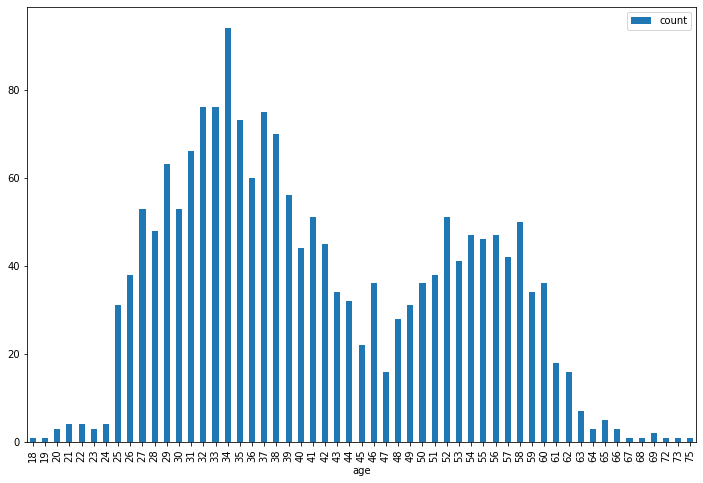

In [180]:
# Посмотрим распределение отточных клиентов по возрасту:

data[data['churn']==1]['age'].value_counts().reset_index().rename(columns={'index':'age', 'age':'count'}).\
sort_values(by='age').plot(kind='bar', figsize = (12,8), x = 'age', y = 'count');

Теперь мы можем выделить возрастные группы с пользователями, имеющим схожие паттерны оттока:
1) от 18 до 24 лет;  
2) от 25 до 45 лет;  
3) от 46 до 62 лет;  
4) 63 года и старше.

In [181]:
# создадим функцию age_group для распределения клиентов по возрастным группам:

def age_group(age):
    if 25 > age >= 18:
        return '18-24'
    if 45 >= age >= 25:
        return '25-45'
    if 62 >= age >= 46:
        return '46-62'
    if 63 <= age:
        return '63+'   

In [182]:
# применим функцию age_group и добавим новый столбец

data['age_group'] = data['age'].apply (age_group)
display (data.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male,age_group
0,183012.00,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,25-45
1,146556.00,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0,25-45
2,120722.00,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0,25-45
3,225363.00,866.00,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,46-62
4,157978.00,730.00,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,25-45


Полученные категориальные значения также необходимо кодировать, чтобы получилось рассчитать корреляцию:

In [183]:
# создадим копию столбца age_group:

data['age_group_2']=data['age_group']
display (data.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male,age_group,age_group_2
0,183012.00,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,25-45,25-45
1,146556.00,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0,25-45,25-45
2,120722.00,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0,25-45,25-45
3,225363.00,866.00,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,46-62,46-62
4,157978.00,730.00,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,25-45,25-45


In [184]:
# кодируем данные в столбце age_group_2:

data = pd.get_dummies(data, columns = ['age_group_2'])
data = data.rename (columns = ({
    'age_group_2_18-24':'18-24', 'age_group_2_25-45':'25-45','age_group_2_46-62':'46-62', 
    'age_group_2_63+':'63+'}))
display (data.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,age_group,18-24,25-45,46-62,63+
0,183012.00,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,...,0,1,0,1,0,25-45,0,1,0,0
1,146556.00,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,...,0,1,0,1,0,25-45,0,1,0,0
2,120722.00,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,...,0,1,0,1,0,25-45,0,1,0,0
3,225363.00,866.00,Ярославль,Ж,51,5,1524746.26,2,0,1,...,0,0,1,1,0,46-62,0,0,1,0
4,157978.00,730.00,Ярославль,М,34,5,174.00,1,1,0,...,0,0,1,0,1,25-45,0,1,0,0


## Исследовательский анализ данных

### Анализ отточных клиентов в разрезе различных параметров

Для начала проанализируем, как отток клиентов коррелирует с другими параметрами, представленными в датафрейме:

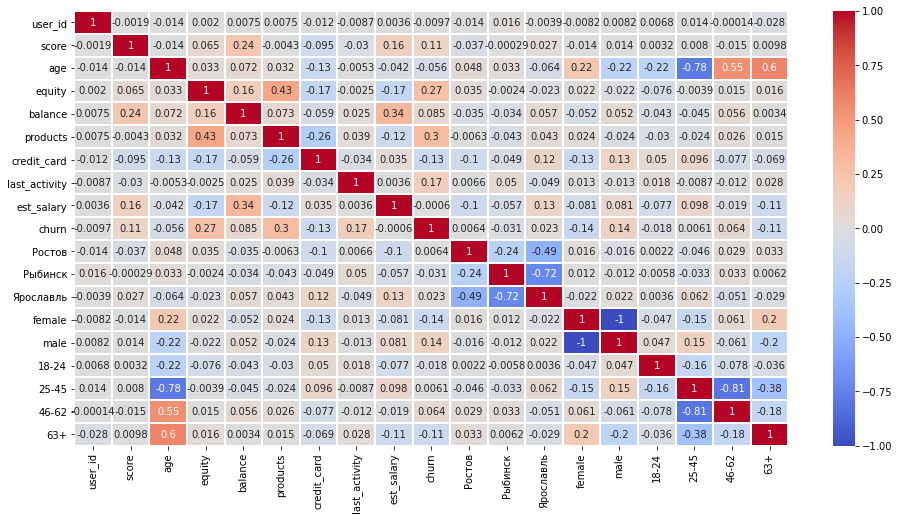

In [185]:
# вызовем метод corr(), чтобы найти коэффициент корреляции для всех столбцов, и построим тепловую карту:

plt.figure(figsize=(16,8))
sns.heatmap (data.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1);

По таблице видно, что наибольшая корреляция с показателем оттока клиентов у таких параметров как: 
- оценка объектов собственности клиента (столбец equity), 
- скоринговый рейтинг клиента (столбец score),
- количество продуктов, которыми пользуется клиент (столбец products), 
- наличие кредитной карты (столбец credit_card),
- активность пользователя (столбец last_activity),
- пол пользователя (столбцы  female и male),
- возраст пользователя.

Рассмотрим эти параметры по отдельности.

#### Оценка объектов собственности

,sum,count,perc
equity,,,
0,90,2588,3.48
1,93,767,12.13
2,165,1038,15.90
3,320,1530,20.92
4,465,1839,25.29
5,577,1911,30.19
6,58,158,36.71
7,37,78,47.44
8,6,17,35.29


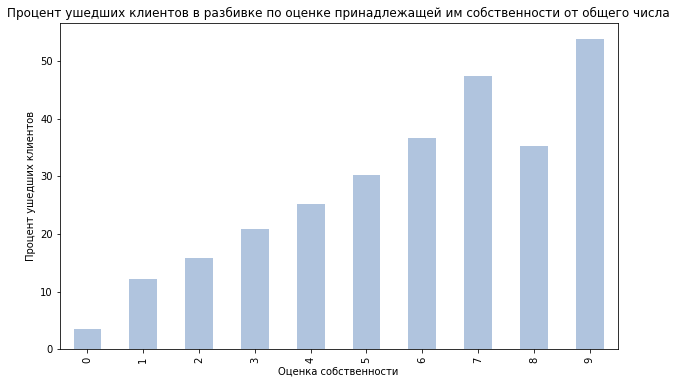

In [186]:
# Рассчитаем процент ушедших клиентов в разбивке по оценке принадлежащей им собственности от общего числа:

equity_churn = data.pivot_table (index = 'equity', values = 'churn', aggfunc = ['sum', 'count'])
equity_churn.columns = equity_churn.columns.droplevel(level=1)
equity_churn ['perc'] = equity_churn['sum']/equity_churn['count']*100

# Построим столбчатую диаграмму:
equity_churn['perc'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по оценке принадлежащей им собственности от общего числа',
    xlabel = 'Оценка собственности', ylabel = 'Процент ушедших клиентов', figsize = (10,6), color = 'lightsteelblue');
equity_churn

Мы видим практически прямую зависимость - чем выше оценка собственности, тем больше процент отточных клиентов (от 3,5% для оценки 0 до почти 54% для оценки 9)

#### Скоринговый рейтинг клиента

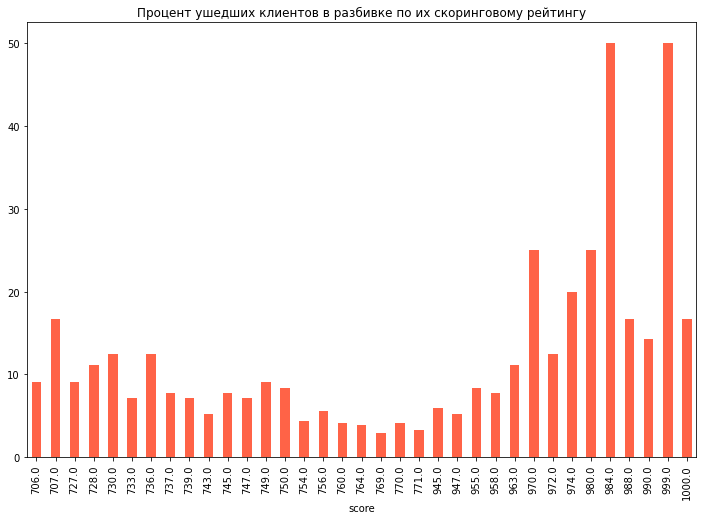

In [187]:
# Рассчитаем процент ушедших клиентов в разбивке по скоринговому рейтингу от общего числа:

score_churn = data.pivot_table (index = 'score', values = 'churn', aggfunc =['sum', 'count'])
score_churn.columns = score_churn.columns.droplevel(level=1)
score_churn ['perc'] = score_churn['sum']/score_churn['count']*100
score_churn = score_churn [score_churn['sum']==1]

# Построим столбчатую диаграмму:

score_churn ['perc'].plot (
    kind = 'bar', figsize = (12,8), color = 'tomato', 
    title = 'Процент ушедших клиентов в разбивке по их скоринговому рейтингу');

Первое, что бросается в глаза - из банка уходили клиенты со скоринговым баллом не ниже 706. Между значениями 707 и 769 наблюдалась тенденция к снижению вероятности ухода клиента по мере возрастания его рейтинга, однако после процент ушедших клиентов стал расти.

#### Количество используемых продуктов

,sum,count,perc
products,,,
1,234,3327,7.03
2,978,5077,19.26
3,297,1035,28.70
4,300,470,63.83
5,9,30,30.00


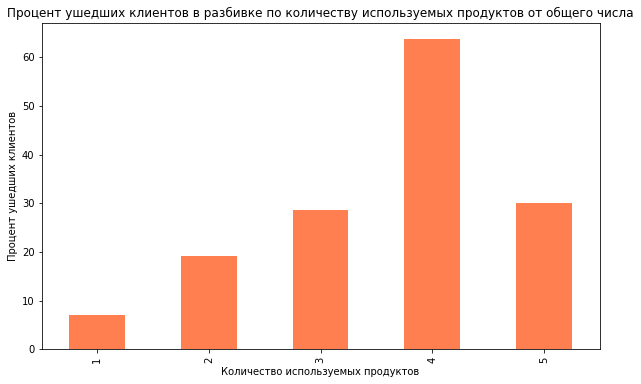

In [188]:
# Рассчитаем процент ушедших клиентов в разбивке по количеству используемых продуктов от общего числа:

products_churn = data.pivot_table (index = 'products', values = 'churn', aggfunc = ['sum', 'count'])
products_churn.columns = products_churn.columns.droplevel(level=1)
products_churn ['perc'] = products_churn['sum']/products_churn['count']*100

# Построим столбчатую диаграмму:
products_churn['perc'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по количеству используемых продуктов от общего числа',
    xlabel = 'Количество используемых продуктов', ylabel = 'Процент ушедших клиентов', figsize = (10,6), 
    color = 'coral');
products_churn

На графике видно, что особенно много (больше половины) клиентов, использовавших 4 продукта, ушли из банка. Среди клиентов, использовавших 2,3 и 5 продуктов доля отточных находится в диапазоне 20-30%, для клиентов, использовавших 1 продукт - не превышает 10%.

#### Наличие кредитной карты

,sum,count,perc
credit_card,,,
0,818,3176,25.76
1,1000,6763,14.79


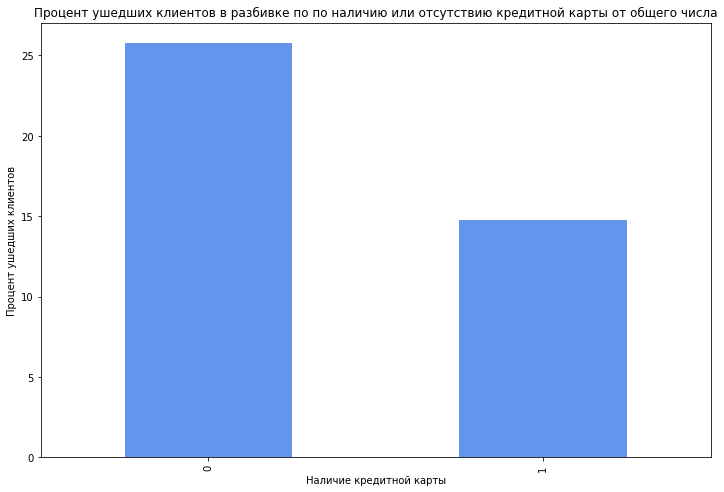

In [189]:
# Рассчитаем процент ушедших клиентов в разбивке по наличию или отсутствию кредитной карты:

credit_card_churn = data.pivot_table (index = 'credit_card', values = 'churn', aggfunc = ['sum', 'count'])
credit_card_churn.columns = credit_card_churn.columns.droplevel(level=1)
credit_card_churn ['perc'] = credit_card_churn['sum']/credit_card_churn['count']*100

# Построим круговую диаграмму:

credit_card_churn['perc'].plot(
    kind='bar', figsize = (12,8), color = 'cornflowerblue', xlabel = 'Наличие кредитной карты',
    title = 'Процент ушедших клиентов в разбивке по по наличию или отсутствию кредитной карты от общего числа',
    ylabel = 'Процент ушедших клиентов');

credit_card_churn

Также наблюдается интересная особенность: среди тех клиентов, у кого была кредитная карта, ушло в почти 2 раза меньше, чем среди тех, у кого кредитной карты не было.    

#### Пользовательская активность

,sum,count,perc
last_activity,,,
0,539,4737,11.38
1,1279,5202,24.59


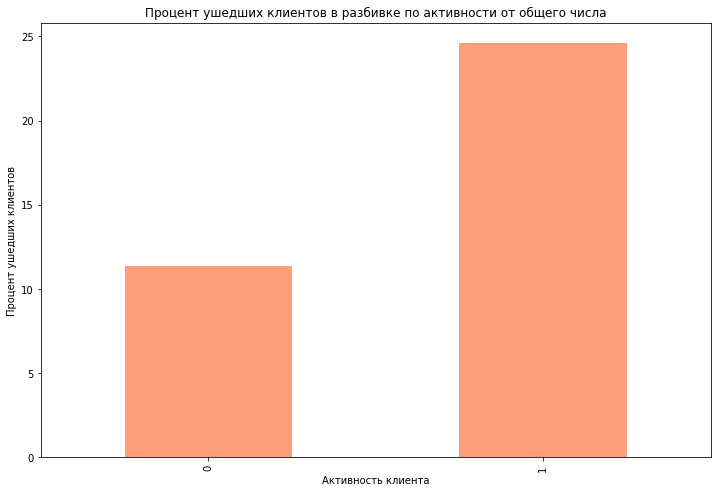

In [190]:
# Рассчитаем процент ушедших клиентов в разбивке по активности от общего числа:

activity_churn = data.pivot_table (index = 'last_activity', values = 'churn', aggfunc = ['sum', 'count'])
activity_churn.columns = activity_churn.columns.droplevel(level=1)
activity_churn ['perc'] = activity_churn['sum']/activity_churn['count']*100

# Построим круговую диаграмму:

activity_churn['perc'].plot(
    kind='bar', title = 'Процент ушедших клиентов в разбивке по активности от общего числа', figsize = (12,8), 
    color = 'lightsalmon', ylabel = 'Процент ушедших клиентов', xlabel = 'Активность клиента');

activity_churn

Здесь мы наблюдаем парадоксальную, казалось бы, картину: у активных клиентов риск оттока в более чем 2 раза больше, чем у неактивных (хотя в целом по выборке их количество отличается не так разительно). Возможно это связано с тем, что активное использование банковских продуктов повышает вероятность в том числе негативного опыта от взаимодействия с банком, и, как следствие - принятию решения об отказе от услуг этого конкретного банка.

#### Пол пользователя

,sum,count,perc
gender,,,
Ж,636,4951,12.85
М,1182,4988,23.70


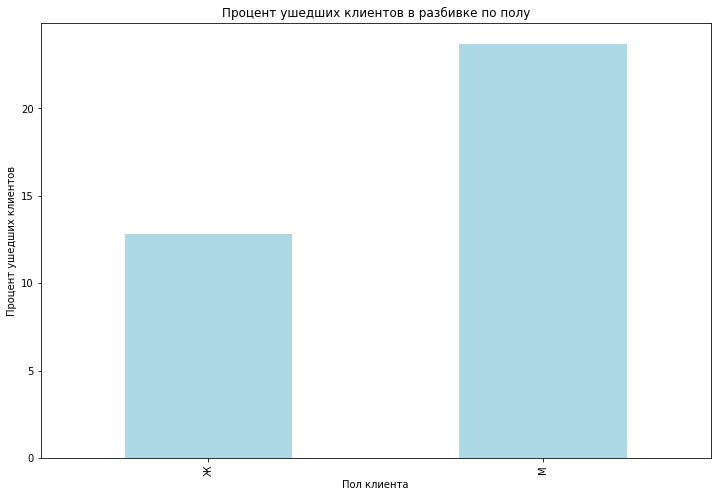

In [191]:
# Рассчитаем процент ушедших клиентов в разбивке по полу от общего числа:

gender_churn = data.pivot_table (index = 'gender', values = 'churn', aggfunc = ['sum', 'count'])
gender_churn.columns = gender_churn.columns.droplevel(level=1)
gender_churn ['perc'] = gender_churn['sum']/gender_churn['count']*100


# Построим круговую диаграмму:

colors = ['cornflowerblue', 'lightsalmon']
mylabels = ['Не были активны','Были активны']
gender_churn['perc'].plot(
    kind='bar', title = 'Процент ушедших клиентов в разбивке по полу', figsize = (12,8), color = 'lightblue', 
    xlabel = 'Пол клиента', ylabel = 'Процент ушедших клиентов');

gender_churn

Мы видим, что среди женщин доля отточных клиентов почти в два раз ниже, чем среди мужчин.

#### Возраст пользователей

,sum,count,perc
age_group,,,
18-24,20,155,12.90
25-45,1160,6280,18.47
46-62,613,2748,22.31
63+,25,756,3.31


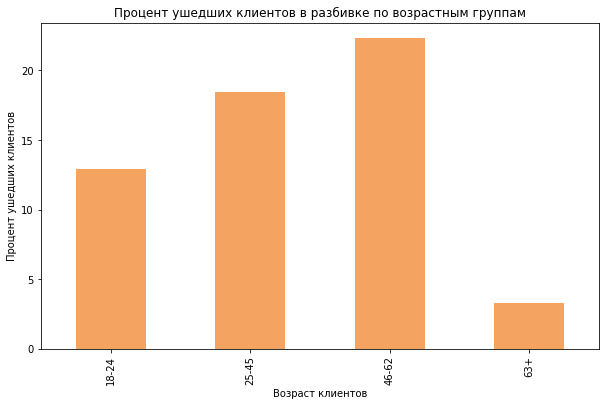

In [192]:
# Рассчитаем процент ушедших клиентов в разбивке по возрастным группам от общего числа:

age_churn = data.pivot_table (index = 'age_group', values = 'churn', aggfunc =['sum', 'count'])
age_churn.columns = age_churn.columns.droplevel(level=1)
age_churn ['perc'] = age_churn['sum']/age_churn['count']*100

# Построим столбчатую диаграмму:
age_churn['perc'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по возрастным группам',
    xlabel = 'Возраст клиентов', ylabel = 'Процент ушедших клиентов', figsize = (10,6), 
    color = 'sandybrown');
age_churn


На графике выделяется явный лидер по оттоку - пользователи в возрасте от 46 до 62 лет, среди них более 20% отточных. Чуть меньше (почти 19%) оттока у возрастной группы 25-45 лет. Минимальный показатель у пользователей старше 63 лет - отточных менее 3%.

#### Город

На тепловой карте не было выявлено корреляции между городом и оттоком клиентов, однако мы все равно проверим этот важный параметр.

,sum,count,perc
city,,,
Ростов,267,1413,18.90
Рыбинск,430,2639,16.29
Ярославль,1121,5887,19.04


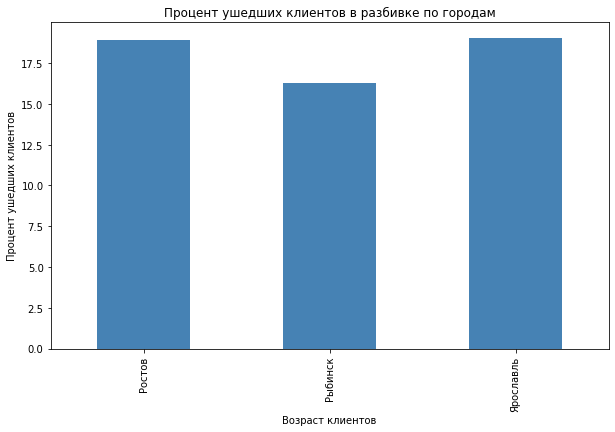

In [193]:
# Рассчитаем процент ушедших клиентов в разбивке по городам от общего числа:

city_churn = data.pivot_table (index = 'city', values = 'churn', aggfunc =['sum', 'count'])
city_churn.columns = city_churn.columns.droplevel(level=1)
city_churn ['perc'] = city_churn['sum']/city_churn['count']*100

# Построим столбчатую диаграмму:
city_churn['perc'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по городам',
    xlabel = 'Возраст клиентов', ylabel = 'Процент ушедших клиентов', figsize = (10,6), 
    color = 'steelblue');
city_churn


Мы видим, что различие в доле ушедших клиентов между городами незначительное. Следовательно, можно подтвердить, что отток клиентов между городами происходил равномерно.

### Составление портретов уходящих клиентов

Итак, по итогам анализа и расчетов корреляции можно выделить несколько портретов отточных пользователей:

#### Портрет №1

Пол: мужской  
Возраст: 46-62  
Город: любой  
Оценка объектов собственности: 5 и выше  
Скоринговый рейтинг: 800 и выше  
Количество используемых продуктов: 3 и больше  
Наличие кредитной карты: нет  
Пользовательская активность: да

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [194]:
portrait1 = data.query (
    'male==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>46 \
    and age<= 62 and products >= 3 and churn==1') 
portrait1


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,age_group,18-24,25-45,46-62,63+
399,212030.00,867.00,Ярославль,М,59,5,851896.68,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
1292,131565.00,826.00,Ярославль,М,60,5,737821.34,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
1420,220656.00,899.00,Ярославль,М,59,5,1682723.25,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
1711,158362.00,870.00,Ярославль,М,52,5,775269.74,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
2623,159063.00,978.00,Рыбинск,М,53,6,2582959.96,4,0,1,...,0,1,0,0,1,46-62,0,0,1,0
2688,127110.00,832.00,Ярославль,М,55,5,585528.59,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
2822,116305.00,920.00,Ярославль,М,61,5,1821523.00,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
3267,211192.00,890.00,Ярославль,М,54,5,3582411.37,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
3861,119157.00,924.00,Ярославль,М,55,5,1675198.33,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
4083,142959.00,927.00,Ярославль,М,57,7,3134542.35,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0


#### Портрет №2

Пол: женский  
Возраст: 46-62  
Город: любой  
Оценка объектов собственности: 5 и выше  
Скоринговый рейтинг: 800 и выше  
Количество используемых продуктов: 3 и больше  
Наличие кредитной карты: нет  
Пользовательская активность: да

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [195]:
portrait2 = data.query (
    'female==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>46 \
    and age <= 62 and products >= 3 and churn==1') 
portrait2


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,age_group,18-24,25-45,46-62,63+
148,122769.00,868.00,Ростов,Ж,58,5,1334745.59,4,0,1,...,1,0,0,1,0,46-62,0,0,1,0
859,177840.00,802.00,Рыбинск,Ж,51,5,1146872.86,3,0,1,...,0,1,0,1,0,46-62,0,0,1,0
1205,213664.00,807.00,Ярославль,Ж,54,5,478592.43,3,0,1,...,0,0,1,1,0,46-62,0,0,1,0
3091,163444.00,836.00,Ростов,Ж,52,5,294315.53,5,0,1,...,1,0,0,1,0,46-62,0,0,1,0
3718,178755.00,889.00,Ярославль,Ж,60,5,725760.89,4,0,1,...,0,0,1,1,0,46-62,0,0,1,0
4134,148952.00,856.00,Ярославль,Ж,52,5,1700165.08,4,0,1,...,0,0,1,1,0,46-62,0,0,1,0
4514,146441.00,936.00,Ярославль,Ж,61,5,3301164.33,4,0,1,...,0,0,1,1,0,46-62,0,0,1,0
5016,143651.00,885.00,Ярославль,Ж,55,5,1316966.94,3,0,1,...,0,0,1,1,0,46-62,0,0,1,0
6105,163196.00,868.00,Ярославль,Ж,59,5,1548910.65,3,0,1,...,0,0,1,1,0,46-62,0,0,1,0
7328,163622.00,862.00,Ярославль,Ж,56,5,942423.50,3,0,1,...,0,0,1,1,0,46-62,0,0,1,0


#### Портрет №3

Пол: любой  
Возраст: от 25 до 45  
Город: любой  
Оценка объектов собственности: 5 и выше  
Скоринговый рейтинг: 750 и выше  
Количество используемых продуктов: 3 и больше  
Наличие кредитной карты: нет  
Пользовательская активность: да

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [196]:
portrait3 = data.query (
    'score >= 750 and credit_card==0 and equity >= 5 and last_activity==1 and age>=25 \
    and age <= 45 and products >= 3 and churn==1') 
portrait3


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,age_group,18-24,25-45,46-62,63+
72,156677.00,873.00,Ярославль,М,39,5,915959.85,3,0,1,...,0,0,1,0,1,25-45,0,1,0,0
81,223978.00,850.00,Рыбинск,М,34,5,351583.16,4,0,1,...,0,1,0,0,1,25-45,0,1,0,0
475,140383.00,908.00,Ярославль,М,33,5,649294.72,4,0,1,...,0,0,1,0,1,25-45,0,1,0,0
734,170176.00,893.00,Ярославль,М,27,5,499315.41,3,0,1,...,0,0,1,0,1,25-45,0,1,0,0
847,115095.00,880.00,Ярославль,Ж,34,5,956027.03,3,0,1,...,0,0,1,1,0,25-45,0,1,0,0
936,134107.00,848.00,Ростов,М,26,5,218655.27,4,0,1,...,1,0,0,0,1,25-45,0,1,0,0
980,153716.00,857.00,Ярославль,Ж,28,7,317884.70,3,0,1,...,0,0,1,1,0,25-45,0,1,0,0
1147,226891.00,864.00,Ярославль,М,39,5,920418.77,3,0,1,...,0,0,1,0,1,25-45,0,1,0,0
1166,194256.00,892.00,Ярославль,Ж,37,5,1182532.82,3,0,1,...,0,0,1,1,0,25-45,0,1,0,0
1204,223416.00,901.00,Ярославль,М,27,5,1007657.77,3,0,1,...,0,0,1,0,1,25-45,0,1,0,0


#### Портрет №4

Пол: любой  
Возраст: от 46 до 62  
Город: любой  
Оценка объектов собственности: менее 5  
Скоринговый рейтинг: 750 и выше  
Количество используемых продуктов: 3 и больше  
Наличие кредитной карты: нет  
Пользовательская активность: да

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [197]:
portrait4 = data.query (
    'score >= 750 and credit_card==0 and equity < 5 and last_activity==1 and age>=46 \
    and age <62 and products >= 3 and churn==1') 
portrait4

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,age_group,18-24,25-45,46-62,63+
927,142574.00,908.00,Ярославль,Ж,56,4,1169266.23,3,0,1,...,0,0,1,1,0,46-62,0,0,1,0
1359,211130.00,833.00,Ярославль,М,55,3,1231184.90,4,0,1,...,0,0,1,0,1,46-62,0,0,1,0
1748,146036.00,832.00,Ярославль,Ж,46,2,395500.59,3,0,1,...,0,0,1,1,0,46-62,0,0,1,0
1851,150276.00,837.00,Ярославль,М,53,3,1404105.68,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
1893,116362.00,883.00,Ярославль,Ж,55,1,362756.49,3,0,1,...,0,0,1,1,0,46-62,0,0,1,0
2236,159760.00,810.00,Ярославль,М,54,4,761640.30,3,0,1,...,0,0,1,0,1,46-62,0,0,1,0
2594,137901.00,804.00,Ярославль,Ж,48,4,911148.51,3,0,1,...,0,0,1,1,0,46-62,0,0,1,0
2911,219223.00,905.00,Ярославль,Ж,52,3,1383614.66,4,0,1,...,0,0,1,1,0,46-62,0,0,1,0
3020,117066.00,926.00,Ярославль,Ж,52,4,2488753.54,3,0,1,...,0,0,1,1,0,46-62,0,0,1,0
3035,181775.00,881.00,Ярославль,Ж,50,4,511237.34,3,0,1,...,0,0,1,1,0,46-62,0,0,1,0


#### Портрет №5

Пол: любой  
Возраст: от 46 до 62  
Город: любой  
Оценка объектов собственности: менее 5  
Скоринговый рейтинг: 750 и выше  
Количество используемых продуктов: 3 и больше  
Наличие кредитной карты: да  
Пользовательская активность: да

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [198]:
portrait5 = data.query (
    'score >= 750 and credit_card==1 and equity < 5 and last_activity==1 and age>=46 \
    and age <63 and products >= 3 and churn==1') 
portrait5

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,age_group,18-24,25-45,46-62,63+
969,178059.00,828.00,Ростов,Ж,62,4,653195.12,3,1,1,...,1,0,0,1,0,46-62,0,0,1,0
972,178092.00,888.00,Ярославль,М,48,4,315074.84,4,1,1,...,0,0,1,0,1,46-62,0,0,1,0
1455,190099.00,928.00,Рыбинск,М,53,4,2414446.77,4,1,1,...,0,1,0,0,1,46-62,0,0,1,0
2204,212529.00,857.00,Ростов,М,57,2,343682.57,4,1,1,...,1,0,0,0,1,46-62,0,0,1,0
2221,145933.00,771.00,Рыбинск,М,52,3,1014910.13,3,1,1,...,0,1,0,0,1,46-62,0,0,1,0
2790,220918.00,847.00,Ярославль,Ж,55,2,410118.95,4,1,1,...,0,0,1,1,0,46-62,0,0,1,0
2960,215667.00,876.00,Рыбинск,Ж,54,2,1137673.90,4,1,1,...,0,1,0,1,0,46-62,0,0,1,0
2962,179595.00,784.00,Ярославль,Ж,61,3,1216077.13,3,1,1,...,0,0,1,1,0,46-62,0,0,1,0
3075,108227.00,927.00,Ярославль,Ж,48,3,2858389.58,4,1,1,...,0,0,1,1,0,46-62,0,0,1,0
3121,134628.00,920.00,Ярославль,Ж,50,3,1636351.29,4,1,1,...,0,0,1,1,0,46-62,0,0,1,0


#### Портрет №6

Пол: мужской  
Возраст: 25-45  
Город: любой  
Оценка объектов собственности: 5 и выше  
Скоринговый рейтинг: 800 и выше  
Количество используемых продуктов: 3 и больше  
Наличие кредитной карты: да  
Пользовательская активность: да

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [199]:
portrait6 = data.query (
    'male==1 and equity>=5 and score >= 800 and credit_card==1 and last_activity==1 and age>=25 \
    and age<=45 and products >= 3 and churn==1') 
portrait6

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,age_group,18-24,25-45,46-62,63+
370,221249.00,803.00,Рыбинск,М,42,7,458193.57,4,1,1,...,0,1,0,0,1,25-45,0,1,0,0
864,208809.00,838.00,Ростов,М,32,6,239613.03,4,1,1,...,1,0,0,0,1,25-45,0,1,0,0
928,220254.00,838.00,Ярославль,М,35,5,1284094.43,4,1,1,...,0,0,1,0,1,25-45,0,1,0,0
1330,226844.00,900.00,Ярославль,М,35,5,3971985.11,4,1,1,...,0,0,1,0,1,25-45,0,1,0,0
1539,211237.00,890.00,Ярославль,М,32,5,1938963.26,4,1,1,...,0,0,1,0,1,25-45,0,1,0,0
1652,186910.00,893.00,Рыбинск,М,26,5,703073.41,4,1,1,...,0,1,0,0,1,25-45,0,1,0,0
1804,115614.00,911.00,Рыбинск,М,44,5,1515849.26,4,1,1,...,0,1,0,0,1,25-45,0,1,0,0
1862,163158.00,897.00,Ярославль,М,29,5,1176545.37,4,1,1,...,0,0,1,0,1,25-45,0,1,0,0
1970,217749.00,845.00,Ярославль,М,29,5,733098.45,4,1,1,...,0,0,1,0,1,25-45,0,1,0,0
2499,224376.00,948.00,Ярославль,М,41,5,3095721.85,4,1,1,...,0,0,1,0,1,25-45,0,1,0,0


#### Портрет №7

Пол: женский  
Возраст: 25-45  
Город: любой  
Оценка объектов собственности: 4 и выше  
Скоринговый рейтинг: 750 и выше  
Количество используемых продуктов: 3 и больше  
Наличие кредитной карты: да  
Пользовательская активность: да

Теперь найдем всех клиентов, удовлетворяющих этим критериям:

In [200]:
portrait7 = data.query (
    'female==1 and equity>=4 and score >= 750 and credit_card==1 and last_activity==1 and age>=25 \
    and age<=45 and products >= 3 and churn==1') 
portrait7

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,age_group,18-24,25-45,46-62,63+
330,161384.00,943.00,Ярославль,Ж,40,4,2853182.50,4,1,1,...,0,0,1,1,0,25-45,0,1,0,0
385,114349.00,898.00,Рыбинск,Ж,41,5,572927.93,4,1,1,...,0,1,0,1,0,25-45,0,1,0,0
494,165161.00,863.00,Ярославль,Ж,31,4,904183.25,4,1,1,...,0,0,1,1,0,25-45,0,1,0,0
523,195914.00,852.00,Ярославль,Ж,39,5,1388255.70,5,1,1,...,0,0,1,1,0,25-45,0,1,0,0
1199,119566.00,866.00,Ярославль,Ж,40,4,1183132.50,4,1,1,...,0,0,1,1,0,25-45,0,1,0,0
1382,103514.00,906.00,Рыбинск,Ж,34,5,1288431.87,4,1,1,...,0,1,0,1,0,25-45,0,1,0,0
1784,140461.00,910.00,Ярославль,Ж,38,5,2117755.34,4,1,1,...,0,0,1,1,0,25-45,0,1,0,0
2227,219815.00,888.00,Ярославль,Ж,26,5,336864.58,4,1,1,...,0,0,1,1,0,25-45,0,1,0,0
2314,134480.00,926.00,Рыбинск,Ж,34,4,414355.25,4,1,1,...,0,1,0,1,0,25-45,0,1,0,0
2800,152983.00,797.00,Ярославль,Ж,33,5,1053977.67,4,1,1,...,0,0,1,1,0,25-45,0,1,0,0


## Статистический анализ данных

### Гипотеза №1: различие доходов оставшихся и отточных клиентов

Сформулируем нулевую и альтернативную гипотезы: 

**H₀:** средние доходы оставшихся и отточных клиентов **равны**  
**H₁:** средние доходы оставшихся и отточных клиентов **не равны**

Для проверки гипотезы проведем t-test:

In [201]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    data[data['churn']==0]['est_salary'],
    data[data['churn']==1]['est_salary'], equal_var = False)

alpha = 0.05

# вывод значения p-value на экран 
print (results.pvalue) 
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.947527561066995
Не получилось отвергнуть нулевую гипотезу


Проведенный t-test показал, что нулевую гипотезу об отсутствии различий в доходах отточных и оставшихся клиентов опровергнуть не удалось.

### Гипотеза №2: различие в оценке объектов собственности отточных и оставшихся клиентов

Сформулируем нулевую и альтернативную гипотезы: 

**H₀:** средние оценки собственности оставшихся и отточных клиентов **равны**  
**H₁:** средние оценки собственности оставшихся и отточных клиентов **не равны**

Для проверки гипотезы проведем t-test:

In [202]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    data[data['churn']==0]['equity'],
    data[data['churn']==1]['equity'], equal_var = False)

alpha = 0.05

# вывод значения p-value на экран 
print (results.pvalue) 
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

6.872650310275268e-199
Отвергаем нулевую гипотезу


Проведенный t-test показал, что нулевую гипотезу об отсутствии различий в оценке собственности отточных и оставшихся клиентов следует опровергнуть (что также подтверждается проведенным ранее исследовательским анализом)

### Гипотеза №3: различие в количестве используемых банковских продуктов

Сформулируем нулевую и альтернативную гипотезы: 

**H₀:** среднее количество используемых банковских продуктов оставшихся и отточных клиентов **равны**  
**H₁:** среднее количество используемых банковских продуктов оставшихся и отточных клиентов **не равны**

Для проверки гипотезы проведем t-test:

In [203]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    data[data['churn']==0]['products'],
    data[data['churn']==1]['products'], equal_var = False)

alpha = 0.05

# вывод значения p-value на экран 
print (results.pvalue) 
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.466831495421153e-138
Отвергаем нулевую гипотезу


Здесь мы также видим в результате проведенного t-test-а, что нулевая гипотеза об отсутствии различий в количестве используемых банковских продуктов, должна быть отвергнута (что также подтверждается проведенным ранее исследовательским анализом).

### Гипотеза №4: различие в наличии или отсутствии кредитной карты

Сформулируем нулевую и альтернативную гипотезы: 

**H₀:** среднее количество кредитных карт у оставшихся и отточных клиентов **равны**  
**H₁:** среднее количество кредитных карт у оставшихся и отточных клиентов **не равны**

Для проверки гипотезы проведем t-test:

In [204]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    data[data['churn']==0]['credit_card'],
    data[data['churn']==1]['credit_card'], equal_var = False)

alpha = 0.05

# вывод значения p-value на экран 
print (results.pvalue) 
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

4.0681005395702976e-35
Отвергаем нулевую гипотезу


Еще один критерий, по которому t-test выявил наличие статистически значимой разницы между оставшимися и отточными пользователями - наличие кредитной карты. Как было установлено в ходе исследовательского анализа, ушедшие клиенты намного реже пользовались кредитными картами, чем оставшиеся клиенты.

## Сегментация пользователей и их приоритезация

По итогам проведенного анализа и проверки гипотез выделим несколько высокоотточных сегментов пользователей.

В качестве критериев для выделения выберем следующие параметры:
- пол;
- возраст;
- оценка объектов собственности;
- количество используемых продуктов.

### Сегмент №1

Пол: мужской  
Возраст: 46-62  
Город: любой  
Оценка объектов собственности: 5 и выше  
Скоринговый рейтинг: 800 и выше  
Количество используемых продуктов: 3 и больше  
Наличие кредитной карты: нет  
Пользовательская активность: да

In [205]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №1:', data.query (
    'male==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products >= 3')['user_id'].count() )


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №1:', data.query (
    'male==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products >= 3 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №1:', data.query (
    'male==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products >= 3 and churn==1')['user_id'].count() / data.query (
    'male==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products >= 3')['user_id'].count()*100)

Общее число пользователей в сегменте №1: 31
Число отточных пользователей в сегменте №1: 20
Доля отточных пользователей в сегменте №1: 64.51612903225806


### Сегмент №2

Пол: женский  
Возраст: 46-62  
Город: любой  
Оценка объектов собственности: 5 и выше  
Скоринговый рейтинг: 800 и выше  
Количество используемых продуктов: 3 и больше  
Наличие кредитной карты: нет  
Пользовательская активность: да

In [206]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №2:', data.query (
    'female==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products >= 3')['user_id'].count() )


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №2:', data.query (
    'female==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products >= 3 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №2:', data.query (
    'female==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products >= 3 and churn==1')['user_id'].count() / data.query (
    'female==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products >= 3')['user_id'].count()*100)

Общее число пользователей в сегменте №2: 26
Число отточных пользователей в сегменте №2: 16
Доля отточных пользователей в сегменте №2: 61.53846153846154


### Сегмент №3

Пол: мужской  
Возраст: от 46 до 62  
Город: любой  
Оценка объектов собственности: 5 и выше  
Скоринговый рейтинг: 800 и выше  
Количество используемых продуктов: менее 3  
Наличие кредитной карты: нет  
Пользовательская активность: да

In [207]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №3:', data.query (
    'male==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products <3')['user_id'].count() )


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №3:', data.query (
    'male==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products < 3 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №3:', data.query (
    'male==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products < 3 and churn==1')['user_id'].count() / data.query (
    'male==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products < 3')['user_id'].count()*100)

Общее число пользователей в сегменте №3: 45
Число отточных пользователей в сегменте №3: 31
Доля отточных пользователей в сегменте №3: 68.88888888888889


### Сегмент №4

Пол: женский  
Возраст: от 46 до 62  
Город: любой  
Оценка объектов собственности: 5 и выше  
Скоринговый рейтинг: 800 и выше  
Количество используемых продуктов: менее 3  
Наличие кредитной карты: нет  
Пользовательская активность: да

In [208]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №4:', data.query (
    'female==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products <3')['user_id'].count() )


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №4:', data.query (
    'female==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products < 3 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №4:', data.query (
    'female==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products < 3 and churn==1')['user_id'].count() / data.query (
    'female==1 and equity>=5 and score >= 800 and credit_card==0 and last_activity==1 and age>=46 \
    and age<=62 and products < 3')['user_id'].count()*100)

Общее число пользователей в сегменте №4: 55
Число отточных пользователей в сегменте №4: 25
Доля отточных пользователей в сегменте №4: 45.45454545454545


### Сегмент №5

Пол: любой  
Возраст: от 25 до 45  
Город: любой  
Оценка объектов собственности: менее 5  
Скоринговый рейтинг: 750 и выше  
Количество используемых продуктов: 3 и больше  
Наличие кредитной карты: нет  
Пользовательская активность: да

In [209]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №5:', data.query (
    'score >= 750 and credit_card==0 and equity < 5 and last_activity==1 and age>=25 \
    and age <=45 and products >= 3')['user_id'].count() )


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №5:', data.query (
    'score >= 750 and credit_card==0 and equity < 5 and last_activity==1 and age>=25 \
    and age <=45 and products >= 3 and churn==1')['user_id'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №5:', data.query (
    'score >= 750 and credit_card==0 and equity < 5 and last_activity==1 and age>=25 \
    and age <=45 and products >= 3 and churn==1')['user_id'].count() / data.query (
    'score >= 750 and credit_card==0 and equity < 5 and last_activity==1 and age>=25 \
    and age <=45 and products >= 3')['user_id'].count()*100)

Общее число пользователей в сегменте №5: 154
Число отточных пользователей в сегменте №5: 58
Доля отточных пользователей в сегменте №5: 37.66233766233766


### Сегмент №6

Пол: мужской  
Возраст: от 25 до 45  
Город: любой  
Оценка объектов собственности: менее 5  
Скоринговый рейтинг: 750 и выше  
Количество используемых продуктов: менее 3  
Наличие кредитной карты: нет  
Пользовательская активность: да

In [210]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №6:', data.query (
    'male == 1 and score >= 750 and credit_card==0 and equity < 5 and last_activity==1 and age>=25 \
    and age <=45 and products < 3')['user_id'].count() )

# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №6:', data.query (
    'male == 1 and score >= 750 and credit_card==0 and equity < 5 and last_activity==1 and age>=25 \
    and age <=45 and products < 3 and churn==1')['user_id'].count() )

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №6:', data.query (
    'male == 1 and score >= 750 and credit_card==0 and equity < 5 and last_activity==1 and age>=25 \
    and age <=45 and products < 3 and churn==1')['user_id'].count() / data.query (
    'male == 1 and score >= 750 and credit_card==0 and equity < 5 and last_activity==1 and age>=25 \
    and age <=45 and products < 3')['user_id'].count() * 100)

Общее число пользователей в сегменте №6: 221
Число отточных пользователей в сегменте №6: 71
Доля отточных пользователей в сегменте №6: 32.126696832579185


### Сегмент №7

Пол: женский  
Возраст: от 25 до 45  
Город: любой  
Оценка объектов собственности: менее 5  
Скоринговый рейтинг: 750 и выше  
Количество используемых продуктов: менее 3  
Наличие кредитной карты: нет  
Пользовательская активность: да

In [211]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №7:', data.query (
    'female == 1 and score >= 750 and credit_card==0 and equity < 5 and last_activity==1 and age>=25 \
    and age <=45 and products < 3')['user_id'].count() )

# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №7:', data.query (
    'female == 1 and score >= 750 and credit_card==0 and equity < 5 and last_activity==1 and age>=25 \
    and age <=45 and products < 3 and churn==1')['user_id'].count() )

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №7:', data.query (
    'female == 1 and score >= 750 and credit_card==0 and equity < 5 and last_activity==1 and age>=25 \
    and age <=45 and products < 3 and churn==1')['user_id'].count() / data.query (
    'female == 1 and score >= 750 and credit_card==0 and equity < 5 and last_activity==1 and age>=25 \
    and age <=45 and products < 3')['user_id'].count() * 100)

Общее число пользователей в сегменте №7: 274
Число отточных пользователей в сегменте №7: 79
Доля отточных пользователей в сегменте №7: 28.832116788321166


### Приоритизация сегментов

Расположим сегменты в порядке убывания доли отточных клиентов:

1) Наиболее высокая доля отточных клиентов в **сегменте №3** - почти 69% отточных клиентов

Пол: мужской  
Возраст: от 46 до 64 лет  
Город: любой  
Оценка объектов собственности: 5 и выше  
Скоринговый рейтинг: 800 и выше  
Количество используемых продуктов: менее 3  
Наличие кредитной карты: нет  
Пользовательская активность: да

2) За ним следует **сегмент №1** - более 64% ушедших клиентов

Пол: мужской  
Возраст: от 46 до 64 лет  
Город: любой  
Оценка объектов собственности: 5 и выше  
Скоринговый рейтинг: 800 и выше  
Количество используемых продуктов: 3 и больше  
Наличие кредитной карты: нет  
Пользовательская активность: да

3) Далее располагается **сегмент №2** - более 61% оттока

Пол: женский  
Возраст: от 46 до 64 лет  
Город: любой  
Оценка объектов собственности: 5 и выше  
Скоринговый рейтинг: 800 и выше  
Количество используемых продуктов: 3 и больше  
Наличие кредитной карты: нет  
Пользовательская активность: да

4) С значительным отрывом за ним следует **сегмент №4** - более 45% ушедших клиентов

Пол: женский  
Возраст: от 46 до 64 лет
Город: любой  
Оценка объектов собственности: 5 и выше  
Скоринговый рейтинг: 800 и выше  
Количество используемых продуктов: менее 3  
Наличие кредитной карты: нет  
Пользовательская активность: да

5) На следующей строчке располагается **сегмент №5** - более 37% в этом сегменте ушли из банка

Пол: любой  
Возраст: от 25 до 45 лет  
Город: любой  
Оценка объектов собственности: менее 5  
Скоринговый рейтинг: 750 и выше  
Количество используемых продуктов: 3 и больше  
Наличие кредитной карты: нет  
Пользовательская активность: да

6) Далее находится **сегмент №6** с показателем оттока в 32%

Пол: мужской  
Возраст: от 25 до 45 лет  
Город: любой  
Оценка объектов собственности: менее 5  
Скоринговый рейтинг: 750 и выше  
Количество используемых продуктов: менее 3  
Наличие кредитной карты: нет  
Пользовательская активность: да

7) На последней строке находится **сегмент №7** - более 28% отточных клиентов

Пол: женский  
Возраст: от 25 до 45 лет  
Город: любой  
Оценка объектов собственности: менее 5  
Скоринговый рейтинг: 750 и выше  
Количество используемых продуктов: менее 3  
Наличие кредитной карты: нет  
Пользовательская активность: да

## Итоговые выводы и рекомендации по каждому из сегментов

### Итоговые выводы

1) Проведенное исследование показало, что между оттоком клиентов и некоторыми параметрами существует устойчивая корреляция, тогда как другие параметры практически не влияют на отток. 

К параметрам, влияющим на отток, относятся: 

- **оценка объектов собственности клиента:** чем выше оценка собственности, тем больше процент отточных клиентов;
- **скоринговый рейтинг клиента:** из банка уходили клиенты со скоринговым баллом не ниже 706, а клиенты с более высоким скоринговым рейтингом показывали более высокий процент оттока;
- **количество продуктов, которыми пользуется клиент:** клиенты, использовавшие 4 продукта, уходили из банка намного чаще, чем другие;
- **наличие кредитной карты:** отсутствие у клиента кредитной карты сильно повышало риск его оттока из банка;
- **активность пользователя:** более активные клиенты покидали банк чаще, чем менее активные;
- **пол пользователя:** мужчины намного сильнее склонны уходить из банка, чем женщины;
- **возраст пользователя:** наиболее отточные возрастные группы - 46-62 и 25-45.

2) Был проведен статистический анализ следующих гипотез:

**Гипотеза №1** о различии **доходов** оставшихся и отточных клиентов: не подтвердилась  
**Гипотеза №2** о различии в **оценке объектов собственности** отточных и оставшихся клиентов: подтвердилась  
**Гипотеза №3** о различии в **количестве используемых банковских продуктов** оставшихся и отточных клиентов: подтвердилась  
**Гипотеза №4** о различии в **наличии или отсутствии кредитной карты** оставшихся и отточных клиентов: подтвердилась

3) Были выделены и приоритизированы сегменты, в наибольшей степени подверженных оттоку (от 28 до 69% отточных клиентов)

### Рекомендации для отдела маркетинга

Для улучшения качества обслуживания каждого из выделенных высокоотточных сегментов можно выделить следующие рекомендации:
    
1) **Сегмент №3** - более 69% отточных клиентов

Пол: мужской  
Возраст: от 46 до 62 лет  
Город: любой  
Оценка объектов собственности: 5 и выше  
Скоринговый рейтинг: 800 и выше  
Количество используемых продуктов: менее 3  
Наличие кредитной карты: нет  
Пользовательская активность: да

Рекомендации: 
- предложить специальные условия по страхованию объектов собственности;
- информировать о новых доступных банковских продуктах;
- предложить оформить кредитную карту;
- для клиентов пенсионного возраста - предложить льготные условия для перевода пенсии в наш банк;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк;
- предложить повышенный кешбек на товары для спорта, активного отдыха и рыбалки.

2) **Сегмент №1** - более 65% ушедших клиентов

Пол: мужской  
Возраст: от 46 до 62 лет  
Город: любой  
Оценка объектов собственности: 5 и выше  
Скоринговый рейтинг: 800 и выше  
Количество используемых продуктов: 3 и больше  
Наличие кредитной карты: нет  
Пользовательская активность: да

Рекомендации:
- предложить специальные условия по страхованию объектов собственности;
- предложить оформить кредитную карту;
- для клиентов пенсионного возраста - предложить льготные условия для перевода пенсии в наш банк;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк;
- предложить повышенный кешбек на товары для спорта, активного отдыха и рыбалки.

3) **Сегмент №2** - более 61% оттока

Пол: женский  
Возраст: от 46 до 62 лет  
Город: любой  
Оценка объектов собственности: 5 и выше  
Скоринговый рейтинг: 800 и выше  
Количество используемых продуктов: 3 и больше  
Наличие кредитной карты: нет  
Пользовательская активность: да

Рекомендации:
- предложить специальные условия по страхованию объектов собственности;
- предложить оформить кредитную карту;
- для клиентов пенсионного возраста - предложить льготные условия для перевода пенсии в наш банк;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк;
- предложить повышенный кешбек на косметику, товары для дома и одежду.

4) **Сегмент №4** - более 45% ушедших клиентов

Пол: женский  
Возраст: от 46 до 62  
Город: любой  
Оценка объектов собственности: 5 и выше  
Скоринговый рейтинг: 800 и выше  
Количество используемых продуктов: менее 3  
Наличие кредитной карты: нет  
Пользовательская активность: да

Рекомендации:
- предложить специальные условия по страхованию объектов собственности;
- информировать о новых доступных банковских продуктах;
- предложить оформить кредитную карту;
- для клиентов пенсионного возраста - предложить льготные условия для перевода пенсии в наш банк;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк;
- предложить повышенный кешбек на косметику, товары для дома и одежду;

5) **Сегмент №5** - более 37% пользователей в этом сегменте ушли из банка

Пол: любой  
Возраст: от 25 до 45  
Город: любой  
Оценка объектов собственности: менее 5  
Скоринговый рейтинг: 750 и выше  
Количество используемых продуктов: 3 и больше  
Наличие кредитной карты: нет  
Пользовательская активность: да

Рекомендации:
- предложить оформить кредитную карту;
- информировать о новых доступных банковских продуктах;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк.


6) **Сегмент №6** с показателем оттока в 32%

Пол: мужской  
Возраст: от 25 до 45  
Город: любой  
Оценка объектов собственности: менее 5  
Скоринговый рейтинг: 750 и выше  
Количество используемых продуктов: менее 3  
Наличие кредитной карты: нет  
Пользовательская активность: да

Рекомендации:
- предложить оформить кредитную карту;
- информировать о новых доступных банковских продуктах;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк;
- предложить повышенный кешбек на товары для спорта, активного отдыха и рыбалки.


7) **Сегмент №7** - более 28% отточных клиентов

Пол: женский  
Возраст: от 25 до 45  
Город: любой  
Оценка объектов собственности: менее 5  
Скоринговый рейтинг: 750 и выше  
Количество используемых продуктов: менее 3  
Наличие кредитной карты: нет  
Пользовательская активность: да

Рекомендации:
- предложить оформить кредитную карту;
- информировать о новых доступных банковских продуктах;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк;
- предложить повышенный кешбек на косметику, товары для дома и одежду.